# Part 1: The Gravitational Potential of the Earth

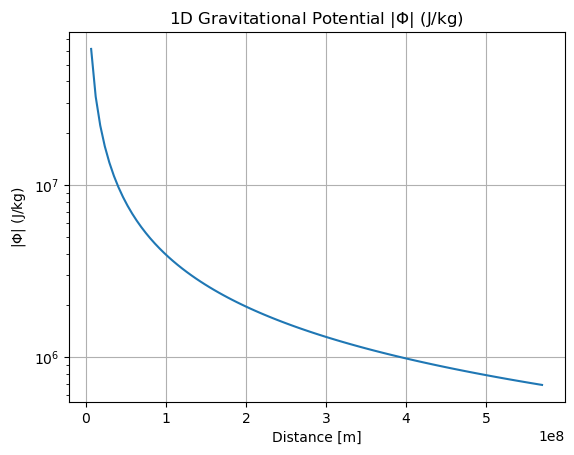

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

G = 6.67*10**-11 # m^3/kg/s^2
g = 9.81 # m/s^2
M_earth = 5.9*10**24 # kg
M_moon = 7.3*10**22 # kg
m_command = 5500 # kg
r_earth = 6378*10**3 # m
r_moon = 1737*10**3 # m
earth_to_moon = 3.8*10**8 # m
exhaust_velo = 2.4*10**3 # m/s
burn_rate = 1.3*10**4 # kg/s
wet_mass = 2.8*10**6 # kg 
dry_mass = 7.5*10**5 # kg


def grav_potential(M,x,y,xm,ym):
    if np.isclose((xm-x)**2 + (ym-y)**2,0):
        return np.nan
    else:
        r = np.sqrt((xm-x)**2 + (ym-y)**2)
        return -(G*M)/r

grav_pot = np.vectorize(grav_potential)

x = np.linspace(r_earth,1.5*earth_to_moon,100)
y = 0
xm = 0
ym = 0

fig,ax = plt.subplots()
ax.plot(x,np.abs(grav_pot(M_earth,x,y,xm,ym)))
ax.set_xlabel("Distance [m]")
ax.set_ylabel(r"$|\Phi$| (J/kg)")
ax.set_title(r"1D Gravitational Potential $|\Phi$| (J/kg)")
ax.set_yscale("log")
ax.grid(True)
plt.savefig("1D_Gravitational_Potential")

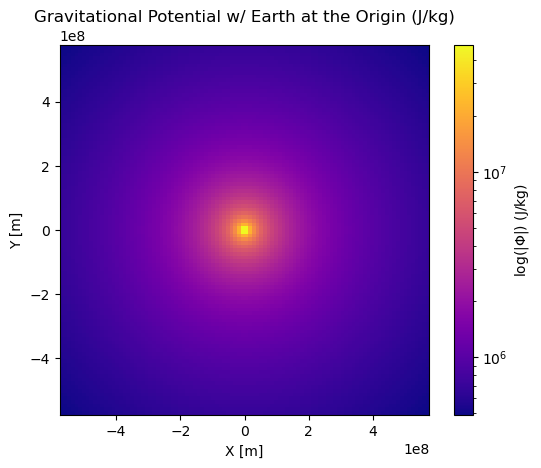

In [2]:
x_earth = 0
y_earth = 0
x2 = np.linspace(-1.5*earth_to_moon,1.5*earth_to_moon, 100)
y2 = np.linspace(-1.5*earth_to_moon,1.5*earth_to_moon, 100)
x_grid, y_grid = np.meshgrid(x2,y2)
z = np.abs(grav_pot(M_earth,x_grid,y_grid,x_earth,y_earth))

fig2, ax2 = plt.subplots(1,1)
mesh = ax2.pcolormesh(x_grid,y_grid,z, norm='log',cmap='plasma')
cbar = fig2.colorbar(mesh,label=r"log($|\Phi$|) (J/kg)")
ax2.set_aspect("equal")
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Y [m]")
ax2.set_title("Gravitational Potential w/ Earth at the Origin (J/kg)");
plt.savefig("Gravitational_Potential_WithEarthAtOrigin")

# Part 2: The Gravitational Potential of the Earth-Moon System

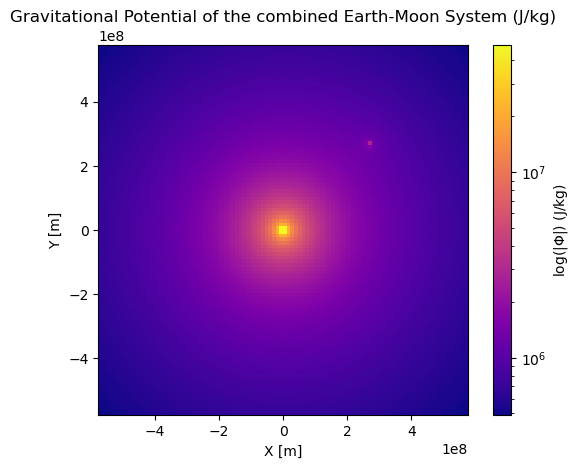

In [3]:
x3 = np.linspace(-1.5*earth_to_moon,1.5*earth_to_moon, 100)
y3 = np.linspace(-1.5*earth_to_moon,1.5*earth_to_moon, 100)
x_grid2, y_grid2 = np.meshgrid(x2,y2)
z2 = np.abs(grav_pot(M_moon,x_grid2,y_grid2,earth_to_moon/np.sqrt(2),earth_to_moon/np.sqrt(2)))
z3 = z + z2

fig3, ax3 = plt.subplots(1,1)
mesh = ax3.pcolormesh(x_grid2,y_grid2,z3, norm='log',cmap='plasma')
cbar2 = fig3.colorbar(mesh,label=r"log($|\Phi$|) (J/kg)")
ax3.set_aspect("equal")
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Y [m]")
ax3.set_title("Gravitational Potential of the combined Earth-Moon System (J/kg)");
plt.savefig("GravPotentialOfEarth_MoonSystem")

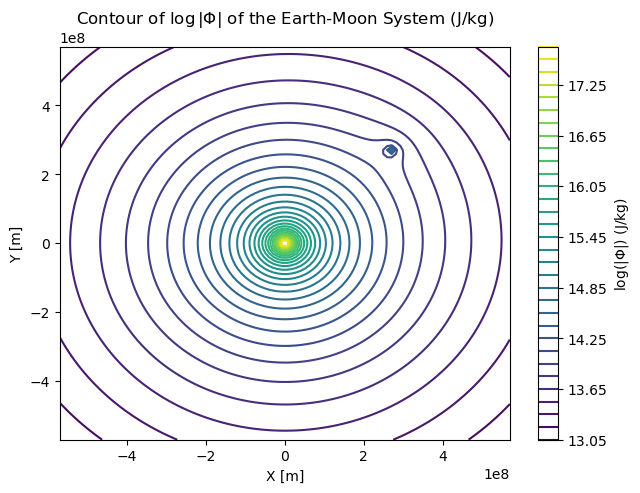

In [4]:
fig4, ax4 = plt.subplots()
cont = ax4.contour(x_grid2,y_grid2,np.log(z3), 40)
cbar3 = fig4.colorbar(cont, label=r'log($|\Phi|$) (J/kg)')
fig4.tight_layout()
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Y [m]")
ax4.set_title(r"Contour of $\log{|\Phi|}$ of the Earth-Moon System (J/kg)");
plt.savefig("Contour_of_Earth_Moon_System")

# Part 3: The Gravitational Force Field of the Earth-Moon System

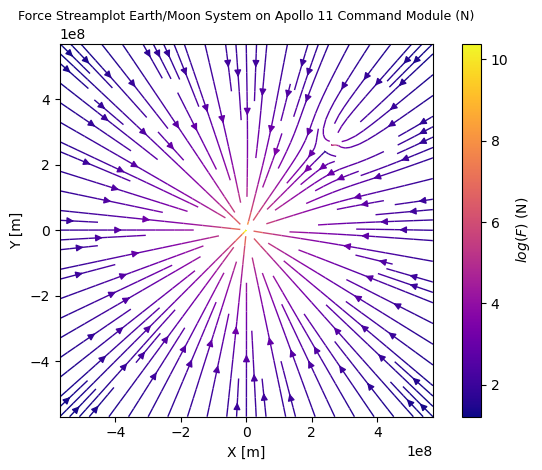

In [5]:
def f(m1,m2,m,x1,y1,x2,y2,x,y):
    if np.isclose((y1-y)**2 + (x1-x)**2,0):
        return np.nan
    elif np.isclose((y2-y)**2 + (x2-x)**2,0):
        return np.nan
    else:
        r1 = np.sqrt((x-x1)**2 + (y-y1)**2)
        r2 = np.sqrt((x-x2)**2 + (y-y2)**2)
        theta1 = np.arctan2((y-y1),(x-x1))
        theta2 = np.arctan2((y-y2),(x-x2))
        F_magnitude1 = (-G*(m1*m))/(r1**2)
        F_magnitude2 = (-G*(m2*m))/(r2**2)
        Fx = F_magnitude1*np.cos(theta1) + F_magnitude2*np.cos(theta2)
        Fy = F_magnitude1*np.sin(theta1) + F_magnitude2*np.sin(theta2)
        return Fx, Fy

x_moon = earth_to_moon/np.sqrt(2)
y_moon = earth_to_moon/np.sqrt(2)

F = np.vectorize(f)

Fx, Fy = F(M_earth,M_moon,m_command,x_earth,y_earth,x_moon,y_moon,x_grid2,y_grid2)

fig5, ax5 = plt.subplots(1,1)

colors = np.log(np.hypot(Fx,Fy))

stream = ax5.streamplot(x_grid2,y_grid2, Fx, Fy,linewidth=1, color = colors, cmap=cm.plasma, density=1.3)
cbar4 = fig5.colorbar(stream.lines, label=r"$log(F)$ (N)")
ax5.set_xlabel("X [m]")
ax5.set_ylabel("Y [m]")
ax5.set_aspect("equal")
ax5.set_title("Force Streamplot Earth/Moon System on Apollo 11 Command Module (N)", fontsize='9');
plt.tight_layout()
plt.savefig("Force_Streamplot_Earth_Moon_System_OnApollo11")

# Part 4: Altitude of the Saturn V Rocket

In [6]:
def t(m_0, m_f,m_dot):
    if np.isclose(m_dot,0):
        return np.nan
    else:
        return (m_0 - m_f)/m_dot

T = np.vectorize(t)
time = T(wet_mass,dry_mass,burn_rate)
print(f"Burn time for the 1st stage of the new Saturn V rocket is {time:.0f} seconds")

Burn time for the 1st stage of the new Saturn V rocket is 158 seconds


In [7]:
def deltaV(t,m_0=wet_mass,m_dot=burn_rate,ex_speed=exhaust_velo,grav=g):
    m = m_0 - m_dot*t
    if np.isclose((m_0/m),np.inf):
        return np.nan
    else:
        delta_v = ex_speed*np.log(m_0/m)-grav*t
        return delta_v

deltV = np.vectorize(deltaV)

In [8]:
from scipy.integrate import quad

height, err = quad(deltV,0,time)
print(f"Altitude of rocket at the end of the burn is {height:.1f} meters")

Altitude of rocket at the end of the burn is 74094.0 meters
